In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import urllib3

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Acessando o dataset pelo drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Criando dataframe com dataset fakebr
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fakebr.csv', sep=';')
df = df[['noticia', 'label']]
df.head() 

,noticia,label
0,Kátia Abreu diz que vai colocar sua expulsão e...,fake
1,Blog esquerdista dá a entender que reclamar de...,fake
2,"Alckmin diz que por ele PSDB desembarca, mas...",fake
3,Cara de pau não tem limites: Zé Celso aciona M...,fake
4,Temer resolve o problema de Luislinda: liberd...,fake


In [ ]:
#Organizando dados para os testes
x_train,x_test,y_train,y_test=train_test_split(df['noticia'], df['label'], test_size=0.25, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('portuguese'),
        analyzer='word',
        ngram_range=(1, 1),
        lowercase=True,
        use_idf=True)

tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [ ]:
#Rodando Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(tfidf_train,y_train)

y_pred = rf.predict(tfidf_test)
a_score = accuracy_score(y_test,y_pred)

In [ ]:
print(f'Acurácia: {round(a_score*100,2)}%')
print(confusion_matrix(y_test, y_pred))

Acurácia: 95.33%
[[887  28]
 [ 56 829]]


In [ ]:
from sklearn.metrics import f1_score
print(f'F1 Score: {round(f1_score(y_test,y_pred, pos_label="fake")*100,2)}%')

F1 Score: 95.48%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


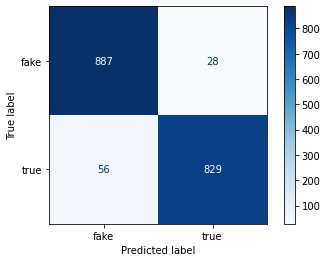

In [ ]:
#matriz de confusao
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, tfidf_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
#Criando dataframe com os resultados e exportando em CSV
df = pd.DataFrame({'Original':y_test, 'Predição':y_pred})
df.to_csv ("/content/drive/My Drive/Colab Notebooks/Teste.csv", encoding="utf-8", sep=';', index=True) 
df

,Original,Predição
3098,fake,fake
2531,fake,fake
4071,true,true
1287,fake,fake
2540,fake,fake
...,...,...
4687,true,true
1979,fake,fake
2465,fake,fake
6267,true,true
